In [41]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.pyplot import cm

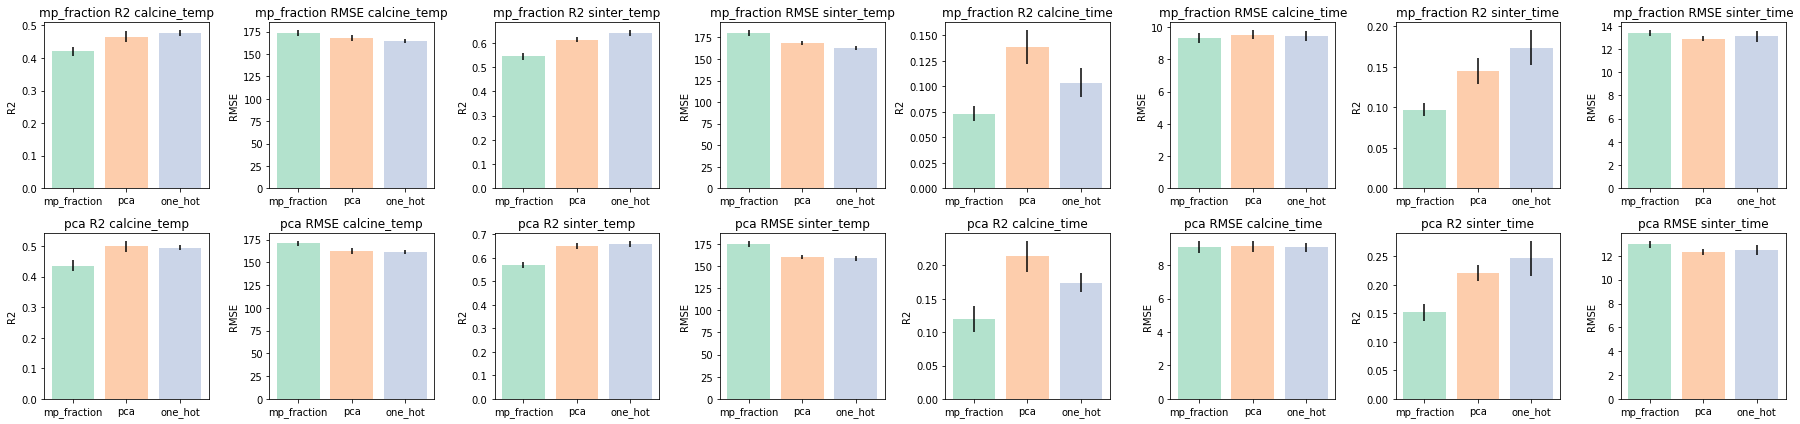

In [71]:
featurizations = ["mp_fraction", "pca"]
imputation_methods = ["mp_fraction", "pca", "one_hot"]

fig, ax = plt.subplots(2, 8, figsize=(25, 6))
for j, featurization in enumerate(featurizations):
    k = 0
    for i in [0, 1, 4, 5]:
        r2 = []
        rmse = []
        x_labels = []
        y_err_r2 = []
        y_err_rmse = []
        for imputation_method in imputation_methods:
            with open("data/" + imputation_method + "_" + featurization + ".json", "r") as f:
                data = json.load(f)
            r2.append(float(data[i]["R2"]))
            y_err_r2.append(float(data[i]["R2_std"]))
            rmse.append(float(data[i]["RMSE"]))
            y_err_rmse.append(float(data[i]["RMSE_std"]))
            x_labels.append(imputation_method)
            objective = data[i]["objective"]
        
        ax[j, k].bar(x_labels, r2, yerr=y_err_r2, color=plt.get_cmap("Pastel2").colors)
        ax[j, k].set_title(featurization + " R2 " + objective)
        ax[j, k].set_ylabel("R2")
        
        k += 1
        
        ax[j, k].bar(x_labels, rmse, yerr=y_err_rmse, color=plt.get_cmap("Pastel2").colors)
        ax[j, k].set_title(featurization + " RMSE " + objective)
        ax[j, k].set_ylabel("RMSE")
        
        k += 1
        
fig.tight_layout()
plt.show()

fig.savefig("figures/imputation_strategy_comparison.png", dpi=150)

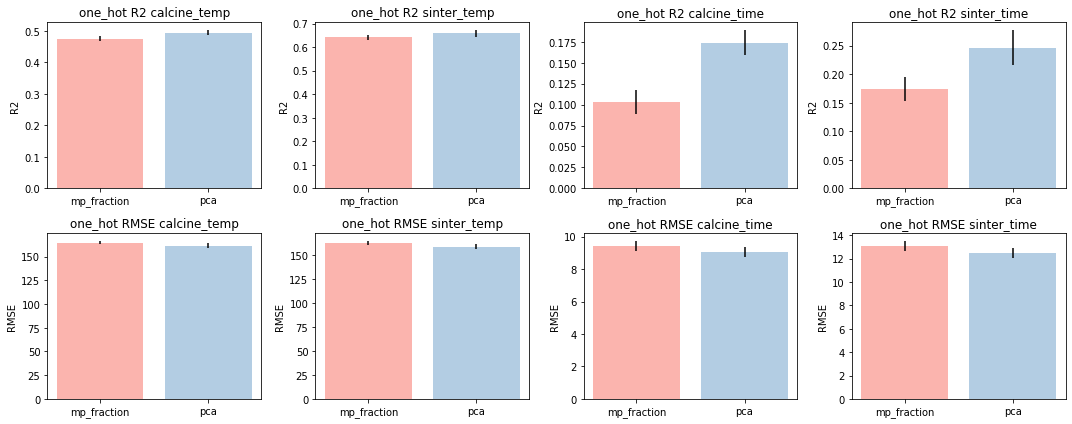

In [78]:
featurizations = ["mp_fraction", "pca"]

fig, ax = plt.subplots(2, 4, figsize=(15, 6))

for j, i in enumerate([0, 1, 4, 5]):
    r2 = []
    rmse = []
    x_labels = []
    y_err_r2 = []
    y_err_rmse = []
    
    for featurization in featurizations:
        with open("data/" + "one_hot" + "_" + featurization + ".json", "r") as f:
            data = json.load(f)
        r2.append(float(data[i]["R2"]))
        y_err_r2.append(float(data[i]["R2_std"]))
        rmse.append(float(data[i]["RMSE"]))
        y_err_rmse.append(float(data[i]["RMSE_std"]))
        x_labels.append(featurization)
        objective = data[i]["objective"]
        
    
    ax[0, j].bar(x_labels, r2, yerr=y_err_r2, color=plt.get_cmap("Pastel1").colors)
    ax[0, j].set_title("one_hot" + " R2 " + objective)
    ax[0, j].set_ylabel("R2")

    ax[1, j].bar(x_labels, rmse, yerr=y_err_rmse, color=plt.get_cmap("Pastel1").colors)
    ax[1, j].set_title("one_hot" + " RMSE " + objective)
    ax[1, j].set_ylabel("RMSE")

fig.tight_layout()
plt.show()

fig.savefig("figures/featurization_strategy_comparison.png", dpi=150)